# 2-D DTFS Homework Notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

## Pre-generated Test Images
The following 32x32 test images are pre-generated for the assignment. These images include:
- Horizontal stripes
- Vertical stripes
- Diagonal stripes
- Checkerboard pattern
- Dots pattern

These images will be used for the DTFS computations in the next parts of the lab.

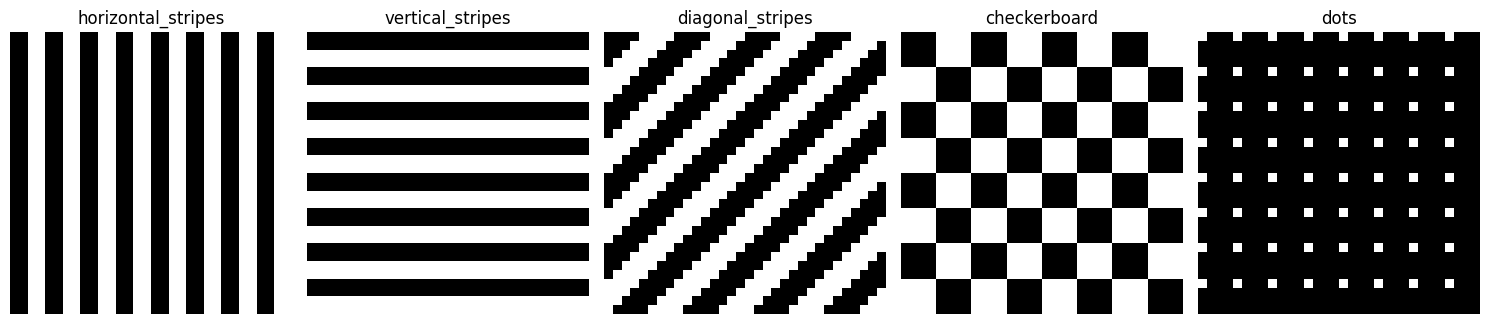

In [3]:
# Update the make_stripes function to use the correct vertical stripes logic

# Function to generate different stripe patterns
def make_stripes(N=32, M=32, orientation='horizontal'):
    if orientation == 'horizontal':
        return np.tile([0, 0, 1, 1], (N, M // 4))
    elif orientation == 'vertical':
        return np.tile([0, 0, 1, 1], (N, M // 4)).T
    elif orientation == 'diagonal':
        return (np.indices((N, M)).sum(axis=0) // 4) % 2
    elif orientation == 'checkerboard':
        i, j = np.indices((N, M))
        return (i // 4 + j // 4) % 2
    elif orientation == 'dots':
        x = np.zeros((N, M))
        x[::4, ::4] = 1
        return x

# Create images using make_stripes function for different orientations
images = {
    "horizontal_stripes": make_stripes(32, 32, 'horizontal'),
    "vertical_stripes": make_stripes(32, 32, 'vertical'),
    "diagonal_stripes": make_stripes(32, 32, 'diagonal'),
    "checkerboard": make_stripes(32, 32, 'checkerboard'),
    "dots": make_stripes(32, 32, 'dots')
}

# Plot images
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for i, (name, img) in enumerate(images.items()):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(name)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

## Part (a) Implement 2-D DTFS and Inverse
In this section, you will implement the 2-D DTFS and inverse DTFS using the definitions.

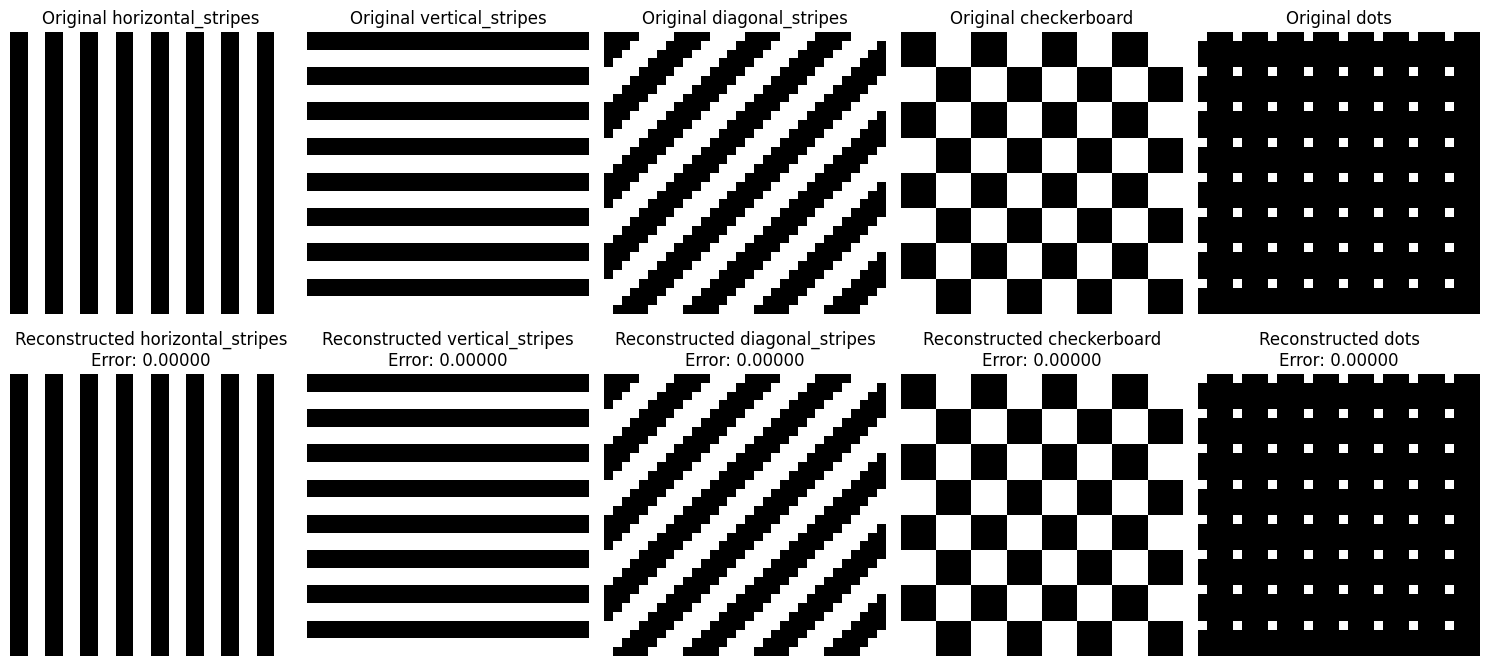

In [4]:
# Define the 2D DTFS and its inverse
def dtfs(x):
    """
    Computes the 2D Discrete-Time Fourier Series (DTFS) coefficients.
    :param x: 2D image array
    :return: 2D DTFS coefficients
    """
    N, M = x.shape
    X = np.zeros((N, M), dtype=complex)
    for k in range(N):
        for l in range(M):
            X[k, l] = 0
            for n in range(N):
                for m in range(M):
                    X[k, l] += x[n, m] * np.exp(-1j * 2 * np.pi * (k * n / N + l * m / M))
            X[k, l] /= (N * M)
    return X

def inverse_dtfs(X):
    """
    Computes the inverse 2D Discrete-Time Fourier Series (DTFS).
    :param X: 2D DTFS coefficients
    :return: Reconstructed 2D image array
    """
    N, M = X.shape
    x_reconstructed = np.zeros((N, M), dtype=complex)
    for n in range(N):
        for m in range(M):
            x_reconstructed[n, m] = 0
            for k in range(N):
                for l in range(M):
                    x_reconstructed[n, m] += X[k, l] * np.exp(1j * 2 * np.pi * (k * n / N + l * m / M))
    return np.real(x_reconstructed)

# Load the images into arrays
image_arrays = {name: np.array(img) for name, img in images.items()}

# Calculate DTFS coefficients and inverse DTFS for each image
dtfs_coeffs = {name: dtfs(img) for name, img in image_arrays.items()}
reconstructed_images = {name: inverse_dtfs(coeffs) for name, coeffs in dtfs_coeffs.items()}

# Compute the maximum absolute reconstruction error
max_reconstruction_errors = {name: np.max(np.abs(reconstructed_images[name] - image_arrays[name])) for name in image_arrays}

# Display the reconstructed images and errors
fig, axs = plt.subplots(2, 5, figsize=(15, 7))

for i, (name, img) in enumerate(images.items()):
    # Plot original images
    axs[0, i].imshow(img, cmap='gray')
    axs[0, i].set_title(f"Original {name}")
    axs[0, i].axis('off')
    
    # Plot reconstructed images
    axs[1, i].imshow(reconstructed_images[name], cmap='gray')
    axs[1, i].set_title(f"Reconstructed {name}\nError: {max_reconstruction_errors[name]:.5f}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

## Part (b) Visualize DTFS Basis
In this section, you will visualize the real part of several DTFS basis functions.

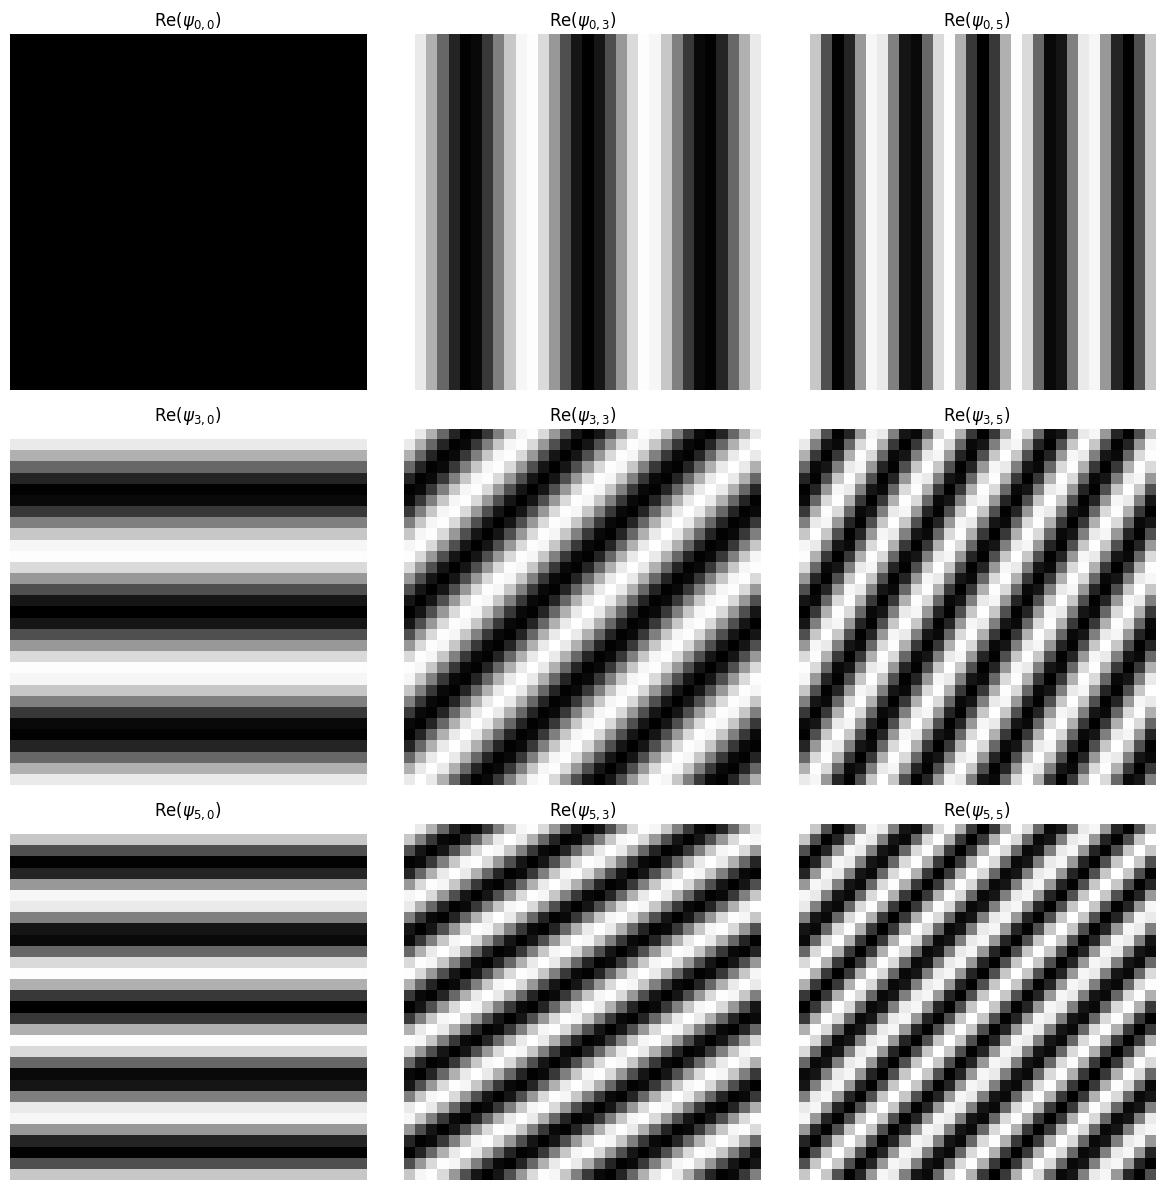

In [5]:
# Part (b): Visualize 2-D DTFS basis components for a small set of (k, l) pairs

def visualize_dtfs_basis(N, M, k_values, l_values):
    """
    Visualize the real part of the 2D DTFS basis functions for specific (k, l) pairs.
    :param N: Number of rows
    :param M: Number of columns
    :param k_values: List of k values to visualize
    :param l_values: List of l values to visualize
    """
    fig, axs = plt.subplots(len(k_values), len(l_values), figsize=(12, 12))
    
    for i, k in enumerate(k_values):
        for j, l in enumerate(l_values):
            # Compute the basis function
            basis_func = np.exp(2j * np.pi * (k * np.arange(N)[:, None] / N + l * np.arange(M) / M))
            real_part = np.real(basis_func)
            
            # Plot the real part of the basis function
            axs[i, j].imshow(real_part, cmap='gray')
            axs[i, j].set_title(f"Re($\\psi_{{{k},{l}}}$)")
            axs[i, j].axis('off')
    
    plt.tight_layout()
    plt.show()
N = 32
M = 32

# Choose small (k, l) values for visualization
k_values = [0, 3, 5]
l_values = [0, 3, 5]

# Visualize the DTFS basis functions for these (k, l) values
visualize_dtfs_basis(N, M, k_values, l_values)

## Part (c) Verify Orthogonality
Check inner products of distinct basis functions.

In [6]:
def verify_orthogonality(N, M, k_values, l_values):
    """
    Verify the orthogonality of 2D DTFS basis functions by calculating the inner product.
    :param N: Number of rows
    :param M: Number of columns
    :param k_values: List of k values to test
    :param l_values: List of l values to test
    :return: Dictionary with inner products
    """
    inner_products = {}
    
    for k in k_values:
        for l in l_values:
            for k_prime in k_values:
                for l_prime in l_values:
                    # Compute the inner product <psi_k,l, psi_k',l'>
                    inner_product = 0
                    for n in range(N):
                        for m in range(M):
                            basis_func1 = np.exp(2j * np.pi * (k * n / N + l * m / M))
                            basis_func2 = np.exp(2j * np.pi * (k_prime * n / N + l_prime * m / M))
                            inner_product += basis_func1 * np.conj(basis_func2)
                    
                    inner_products[(k, l), (k_prime, l_prime)] = inner_product
    
    return inner_products

# Compute the inner products for the selected (k, l) values
inner_products = verify_orthogonality(N, M, k_values, l_values);

# Display the results
inner_products

{((0, 0), (0, 0)): np.complex128(1024+0j),
 ((0, 0),
  (0, 3)): np.complex128(-1.4166445794216997e-13+2.7977620220553945e-14j),
 ((0, 0),
  (0, 5)): np.complex128(-5.706546346573305e-14+1.4244161405940758e-13j),
 ((0, 0),
  (3, 0)): np.complex128(-1.0480505352461478e-13+1.929567616798522e-13j),
 ((0, 0), (3, 3)): np.complex128(-9.686695889854491e-14-3.26405569239796e-14j),
 ((0, 0),
  (3, 5)): np.complex128(-3.3539558740495356e-14+1.7985612998927536e-14j),
 ((0, 0),
  (5, 0)): np.complex128(-3.206324095117452e-13+3.3284486278262193e-13j),
 ((0, 0),
  (5, 3)): np.complex128(-3.143013499370756e-14+1.3655743202889425e-14j),
 ((0, 0),
  (5, 5)): np.complex128(-1.3322676295501878e-15+5.240252676230739e-14j),
 ((0, 3),
  (0, 0)): np.complex128(-1.4166445794216997e-13-2.7977620220553945e-14j),
 ((0, 3), (0, 3)): np.complex128(1024+0j),
 ((0, 3),
  (0, 5)): np.complex128(-3.4094949086238557e-13-5.800915303666443e-14j),
 ((0, 3),
  (3, 0)): np.complex128(-2.886579864025407e-15-3.330669073875469

## Part (d) Parseval’s Theorem
Compute both sides and report the relative error.

In [7]:
def verify_parseval_theorem(x, X):
    """
    Verify Parseval's theorem for 2D DTFS.
    
    :param x: Original 2D image array
    :param X: 2D DTFS coefficients
    :return: Dictionary with energy calculations and relative error
    """
    N, M = x.shape
    time_domain_square_sum = np.sum(np.abs(x)**2)
    frequency_domain_square_sum = N * M * np.sum(np.abs(X)**2)
    
    relative_error = np.abs(time_domain_square_sum - frequency_domain_square_sum) / time_domain_square_sum
    
    return {
        'time_domain_square_sum': time_domain_square_sum,
        'frequency_domain_square_sum': frequency_domain_square_sum,
        'relative_error': relative_error,
    }

parseval_results = {}
for name, image in images.items():
    coeffs = dtfs_coeffs[name]
    parseval_results[name] = verify_parseval_theorem(image, coeffs)

print("Parseval's Theorem Verification:")
print("=" * 50)
for name, result in parseval_results.items():
    print(f"\n{name}:")
    print(f"  Time domain square sum: {result['time_domain_square_sum']:.6f}")
    print(f"  Frequency domain square sum: {result['frequency_domain_square_sum']:.6f}")
    print(f"  Relative error: {result['relative_error']:.2e}")

Parseval's Theorem Verification:

horizontal_stripes:
  Time domain square sum: 512.000000
  Frequency domain square sum: 512.000000
  Relative error: 8.88e-16

vertical_stripes:
  Time domain square sum: 512.000000
  Frequency domain square sum: 512.000000
  Relative error: 8.88e-16

diagonal_stripes:
  Time domain square sum: 512.000000
  Frequency domain square sum: 512.000000
  Relative error: 2.22e-15

checkerboard:
  Time domain square sum: 512.000000
  Frequency domain square sum: 512.000000
  Relative error: 4.44e-16

dots:
  Time domain square sum: 64.000000
  Frequency domain square sum: 64.000000
  Relative error: 0.00e+00


## Part (e) Heatmaps of DTFS Magnitudes
Generate some synthetic test images and plot DTFS magnitude heatmaps.

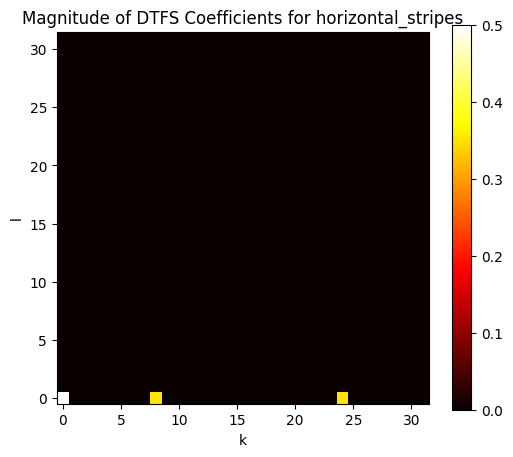

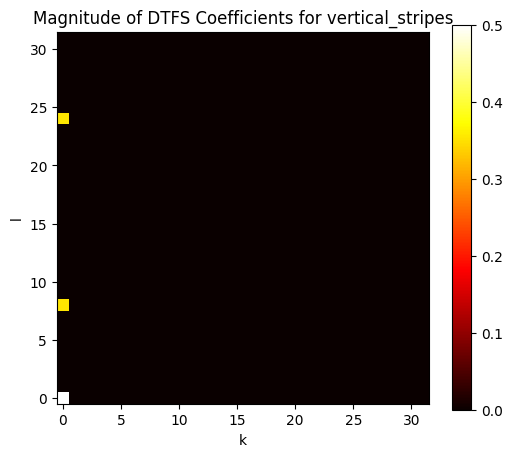

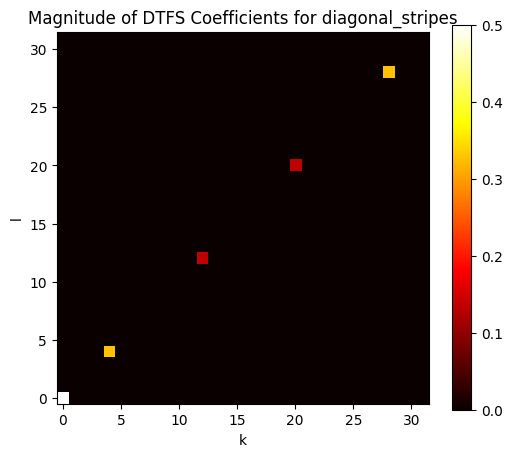

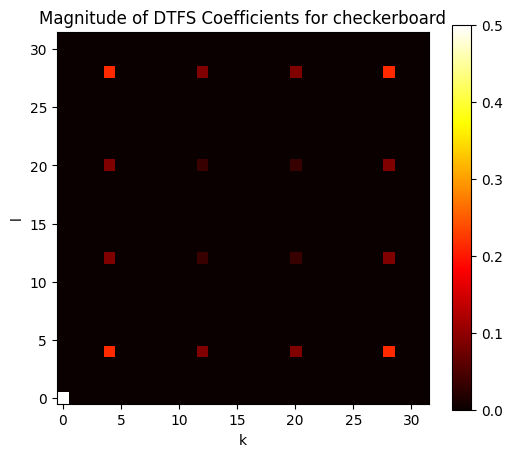

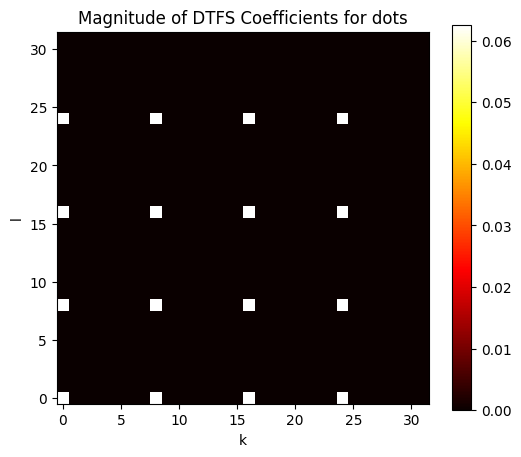

In [8]:
def plot_dtfs_magnitude(X, title):
    """
    Plot the magnitude of the DTFS coefficients |X[k, l]| for a given DTFS matrix X.
    :param X: 2D DTFS coefficients matrix
    :param title: Title of the plot
    """
    plt.figure(figsize=(6, 5))
    plt.imshow(np.abs(X), cmap='hot', interpolation='nearest', origin='lower')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel('l')
    plt.show()

# Plot the DTFS magnitude for each image
for name, coeffs in dtfs_coeffs.items():
    plot_dtfs_magnitude(coeffs, f'Magnitude of DTFS Coefficients for {name}')

## Part (f) Partial Reconstructions
Reconstruct checkerboard image using square, circular, and max sets.

{'Square set (K=8, L=8)': np.float64(0.18169811963188048), 'Square set (K=16, L=16)': np.float64(0.1562499999999999), 'Square set (K=24, L=24)': np.float64(0.12946146728019894)}


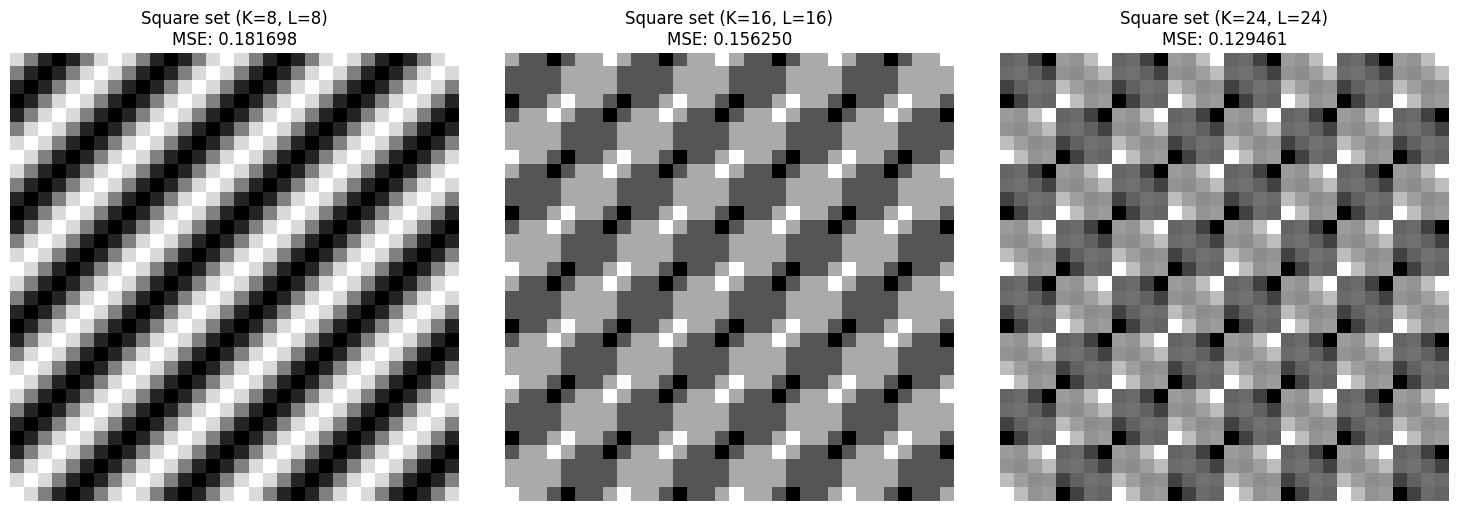

In [9]:
def reconstruct_using_square_set(X, k_max, l_max):
    """
    Reconstruct the image by keeping only the coefficients within the given square region of indices.
    :param X: DTFS coefficients matrix
    :param k_max: Maximum k value for the square region
    :param l_max: Maximum l value for the square region
    :return: Reconstructed image
    """
    N, M = X.shape
    X_reconstructed = np.zeros_like(X, dtype=complex)

    # Keep only coefficients within the square region (k_max, l_max)
    for k in range(k_max + 1):
        for l in range(l_max + 1):
            if k < N and l < M:  # Ensure indices do not go out of bounds
                X_reconstructed[k, l] = X[k, l]

    return inverse_dtfs(X_reconstructed)

def mse(original, reconstructed):
    """
    Compute the Mean Squared Error (MSE) between the original and reconstructed image.
    :param original: Original image
    :param reconstructed: Reconstructed image
    :return: MSE value
    """
    return np.mean((original - reconstructed) ** 2)

# Consider the checkerboard image and its exact DTFS coefficients
checkerboard_image = images['checkerboard']
X_checkerboard = dtfs(checkerboard_image)

# Select three different coefficient selection rules
square_budgets = [64, 256, 576]  # Define coefficient budgets for square set
reconstruction_results = {}

for budget in square_budgets:
    k_max = l_max = int(np.sqrt(budget))
    reconstructed_image = reconstruct_using_square_set(X_checkerboard, k_max, l_max)
    reconstruction_results[f"Square set (K={k_max}, L={l_max})"] = {
        'image': reconstructed_image,
        'mse': mse(checkerboard_image, reconstructed_image)
    }

# Display MSE results
mse_results = {name: result['mse'] for name, result in reconstruction_results.items()}
print(mse_results)

# Plot all 3 reconstructions
fig, axes = plt.subplots(1, len(square_budgets), figsize=(5*len(square_budgets), 5))
for i, (name, result) in enumerate(reconstruction_results.items()):
    axes[i].imshow(result['image'], cmap='gray')
    axes[i].set_title(f"{name}\nMSE: {result['mse']:.6f}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

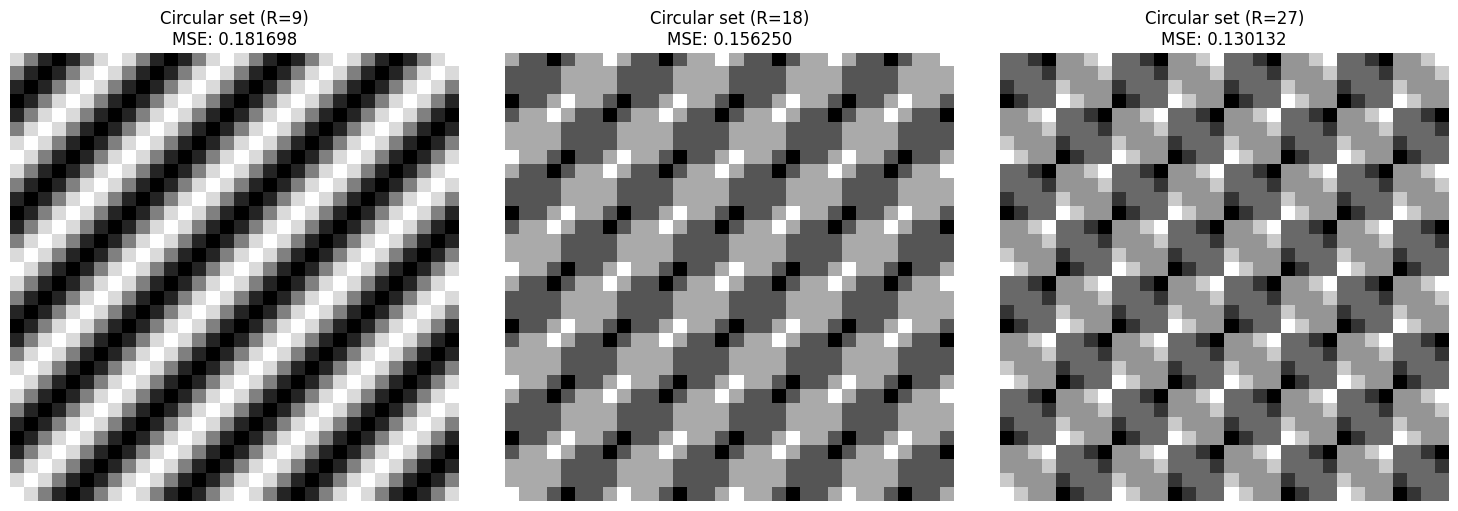

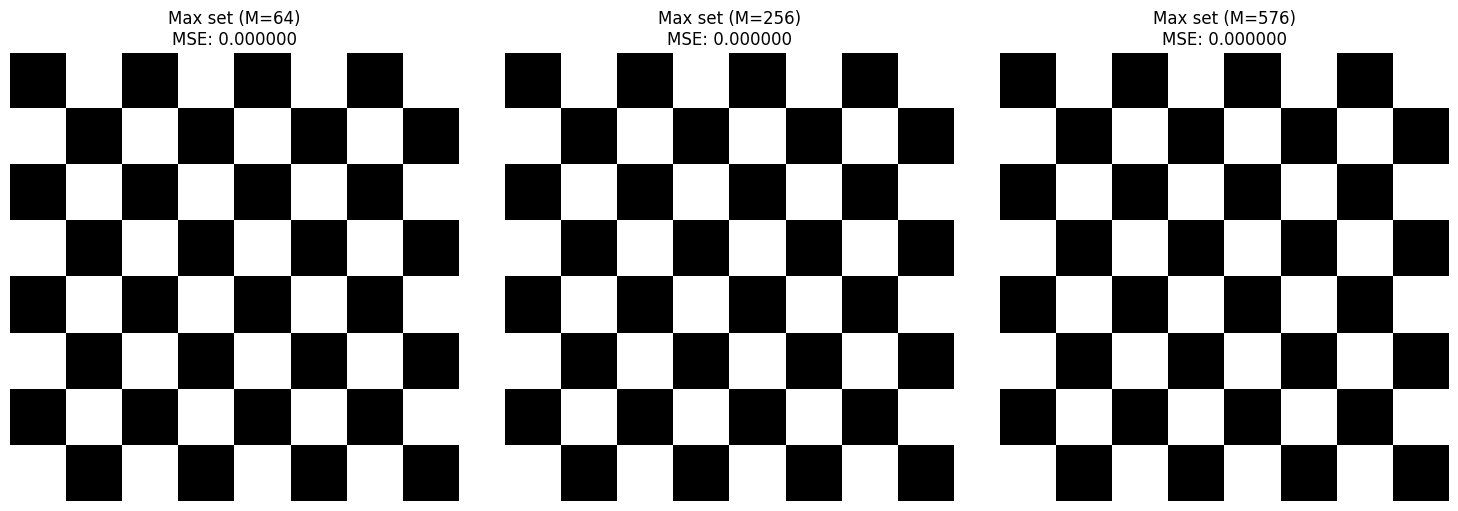

In [10]:
def reconstruct_using_circular_set(X, R):
    """
    Reconstruct the image by keeping coefficients within a circular region of indices (k^2 + l^2 <= R^2).
    :param X: DTFS coefficients matrix
    :param R: Maximum radius (R^2 = k^2 + l^2)
    :return: Reconstructed image
    """
    N, M = X.shape
    X_reconstructed = np.zeros_like(X, dtype=complex)

    for k in range(N):
        for l in range(M):
            if k**2 + l**2 <= R**2:
                X_reconstructed[k, l] = X[k, l]

    return inverse_dtfs(X_reconstructed)

def reconstruct_using_max_set(X, M_max):
    """
    Reconstruct the image by keeping the M_max largest magnitude coefficients.
    :param X: DTFS coefficients matrix
    :param M_max: Number of largest coefficients to keep
    :return: Reconstructed image
    """
    N, M = X.shape
    X_reconstructed = np.zeros_like(X, dtype=complex)

    # Flatten and sort the coefficients by magnitude
    flat_indices = np.argsort(np.abs(X), axis=None)[::-1]
    top_indices = flat_indices[:M_max]

    for idx in top_indices:
        k, l = np.unravel_index(idx, X.shape)
        X_reconstructed[k, l] = X[k, l]

    return inverse_dtfs(X_reconstructed)

# Define radius for circular set and max number of coefficients for max set
R_values = np.int32(np.sqrt(4 * np.array([64, 256, 576]) / np.pi))
max_coefficients = [64, 256, 576]

# Compute MSE for circular and max sets
circular_mse_results = {}
max_set_mse_results = {}

# Circular set reconstructions
for R in R_values:
    reconstructed_image = reconstruct_using_circular_set(X_checkerboard, R)
    circular_mse_results[f"Circular set (R={R})"] = {
        'image': reconstructed_image,
        'mse': mse(checkerboard_image, reconstructed_image)
    }

# Max set reconstructions
for M_max in max_coefficients:
    reconstructed_image = reconstruct_using_max_set(X_checkerboard, M_max)
    max_set_mse_results[f"Max set (M={M_max})"] = {
        'image': reconstructed_image,
        'mse': mse(checkerboard_image, reconstructed_image)
    }

# Display all MSE results
circular_mse_results, max_set_mse_results

# Plot all 3 reconstructions for circular set and max set
fig, axes = plt.subplots(1, len(circular_mse_results), figsize=(5*len(circular_mse_results), 5))
for i, (name, result) in enumerate(circular_mse_results.items()):
    axes[i].imshow(result['image'], cmap='gray')
    axes[i].set_title(f"{name}\nMSE: {result['mse']:.6f}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(max_set_mse_results), figsize=(5*len(max_set_mse_results), 5))
for i, (name, result) in enumerate(max_set_mse_results.items()):
    axes[i].imshow(result['image'], cmap='gray')
    axes[i].set_title(f"{name}\nMSE: {result['mse']:.6f}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## (Just for fun) Reconstruction process

The code below uses your "max_set" reconstruction function to show how the reconstruction quality improves as the number of DTFS coefficients you include increases. It may take a minute to run. You don't need to make any changes to the code as long as reconstruct_using_max_set was implemented correctly. Try it out!

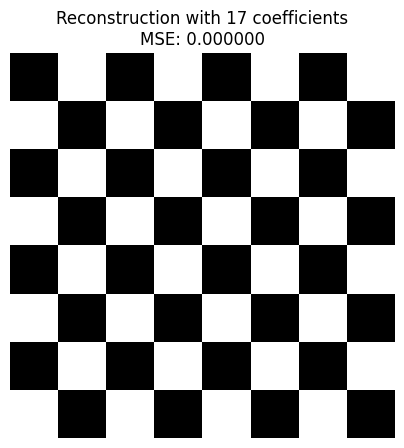

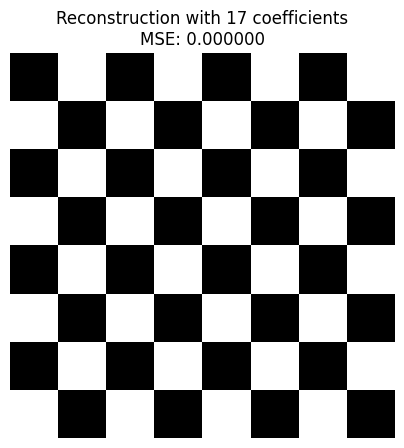

In [11]:
from IPython.display import display, clear_output
import time

fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(np.zeros_like(np.real(X_checkerboard)), cmap="gray", vmin=0, vmax=1)  
ttl = ax.set_title("")
ax.axis("off")

n_frames = int(np.sum(np.abs(X_checkerboard) >= 1e-9)) + 1
for i in range(n_frames):
    img = reconstruct_using_max_set(X_checkerboard, i)
    mse_val = mse(checkerboard_image, img)
    time.sleep(0.5)
    im.set_data(np.real(img))
    ttl.set_text(f"Reconstruction with {i} coefficients\nMSE: {mse_val:.6f}")
    clear_output(wait=True)
    display(fig)
    fig.canvas.flush_events()